<a href="https://colab.research.google.com/github/bigvisionai/opencv-webinar-poisson-image-editing/blob/main/Face_Blending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style="color:rgb(50,120,229)">Overview </font>
In this application, we will try to perform face blending. We will put one face on top of another and blend it in a way that the image editing is not obvious.

In [1]:
# Standard imports
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [ ]:
!git clone https://github.com/bigvisionai/opencv-webinar-poisson-image-editing.git
%cd opencv-webinar-poisson-image-editing

In [ ]:
# Read images
dst = cv2.imread("trump.jpg")
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

src = cv2.imread("obama.jpg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

src_mask = cv2.imread("obama-mask.jpg", cv2.IMREAD_GRAYSCALE)

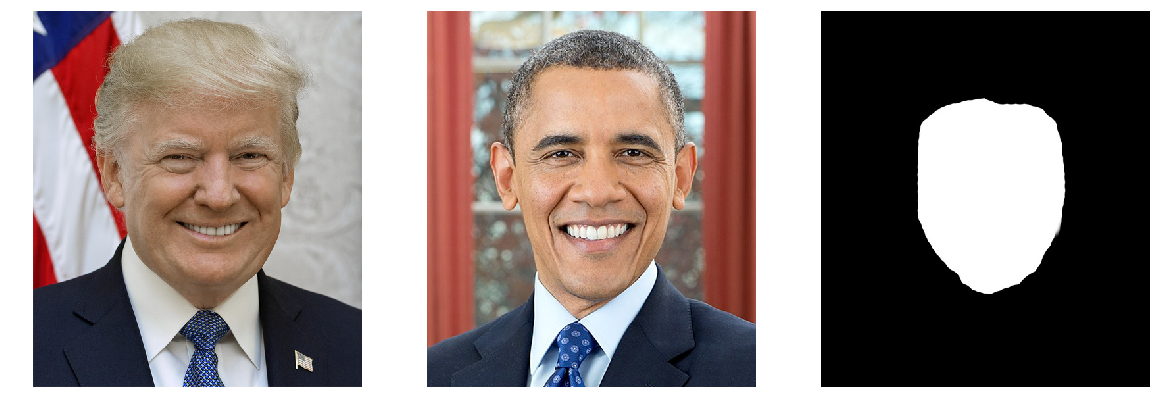

In [ ]:
plt.figure(figsize=(20,10)); 

plt.subplot(131); plt.imshow(dst); plt.axis('off'); 
plt.subplot(132); plt.imshow(src); plt.axis('off'); 
plt.subplot(133); plt.imshow(src_mask, cmap='gray'); plt.axis('off'); 

# <font style="color:rgb(50,120,229)">Simple Alpha Blending with Mask</font>

1. The lighting in the images is very different
2. The skin tones are very different
3. The blend will look ridiculous


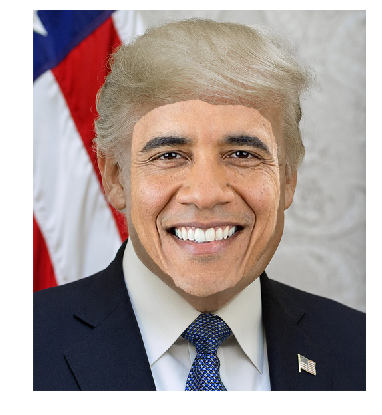

In [ ]:
alpha = cv2.cvtColor(src_mask.copy(), cv2.COLOR_GRAY2RGB)
alpha = alpha.astype(np.float32) / 255.0
output_blend = src * alpha + dst * (1 - alpha)
output_blend = output_blend.astype(np.uint8)
plt.figure(figsize=(7,7)); plt.imshow(output_blend); plt.axis('off'); 


## <font style="color:rgb(50,120,229)">Find Center of the mask </font>

In [ ]:
# Find blob centroid
ret, src_mask_bin = cv2.threshold(src_mask, 128,255, cv2.THRESH_BINARY)
m = cv2.moments(src_mask_bin)
center = (int(m['m01']/m['m00']), int(m['m10']/m['m00']) ) 


## <font style="color:rgb(50,120,229)">Perform Seamless Cloning </font>

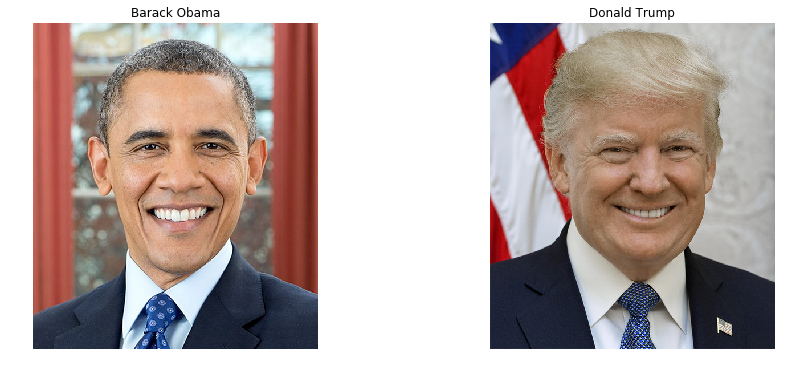

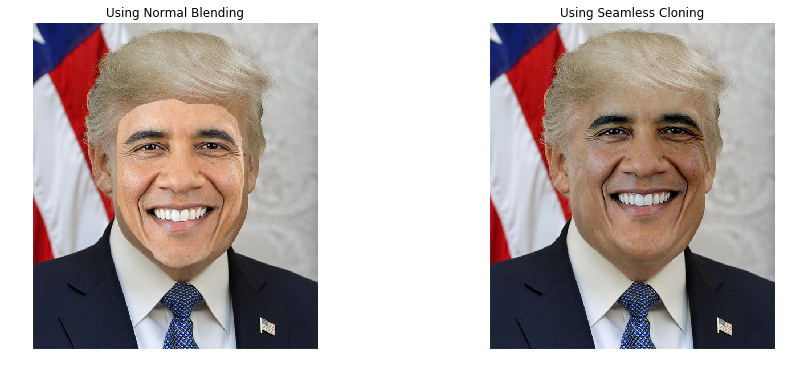

In [ ]:
# Clone seamlessly.
output_clone = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

plt.figure(figsize=(15,6)); 
plt.subplot(121); plt.imshow(src); plt.title("Barack Obama");plt.axis('off'); 
plt.subplot(122); plt.imshow(dst);  plt.title("Donald Trump");plt.axis('off'); 
plt.figure(figsize=(15,6)); 
plt.subplot(121); plt.imshow(output_blend); plt.title("Using Normal Blending");plt.axis('off'); 
plt.subplot(122); plt.imshow(output_clone);  plt.title("Using Seamless Cloning");plt.axis('off'); 
